#         Le perceptron

###  Dans le langage des réseaux de neurones un seul neurone s'appelle un perceptron. Alors qu'est ce que le perceptron ? Le perceptron est l'unité de base des réseaux de neurones. Il s'agit d'un modéle de classification binaire, capable de séparer linéairement 2 classes de points. Le diagramme ci dessous l'explique plus clairement.


![](48631IMG_20211020_145826.jpg)

$\sum w_ix_i + b$  une combinaison linéaire des entrées $x_i$

$f$ une fonction d'activation non linéaire

et $f(\sum w_ix_i + b)$ la sortie

En terme d'algèbre linéaire nous pouvons encore écrire :
## $$ y = f(X^TW + b) $$

ou 
$$
X = 
\begin{pmatrix}
x_1\\
\vdots\\
x_m\\
\end{pmatrix}
$$

et 

$$
W = 
\begin{pmatrix}
w_1\\
\vdots\\
w_m\\
\end{pmatrix}
$$



$f$ la fonction d'activation, par exemple la fonction sigmoid : 

$$ f(z) = 	\sigma(z) = \frac{1}{1+e^{-z}} $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [2]:
X, y = make_blobs(n_samples=1500, n_features=2, centers=2, random_state=0)
y = y.reshape((X.shape[0], 1))

In [3]:
X.shape, y.shape

((1500, 2), (1500, 1))

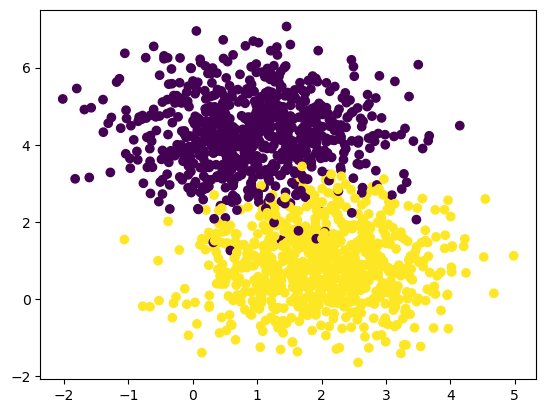

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [5]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

In [6]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1+np.exp(-Z))
    return A

$$L =- \frac{1}{m}\sum y*log(A) + (1-y)*log(1-A)$$

In [7]:
def log_loss(A, y):
    epsilon = 1e-15
    return -1/len(y)*np.sum(y * np.log(A+epsilon) + (1-y)*np.log(1-A+epsilon))

$$\frac{\partial L}{\partial W} = \frac{1}{m}X^T*(A-y)$$



$$\frac{\partial L}{\partial b} = \frac{1}{m}\sum(A-y)$$

In [8]:
def gradients(X, y, A):
    dw = 1 / len(y) * np.dot(X.T, A-y)
    db = 1 / len(y)*np.sum(A-y)
    return (dw, db)

$$ W = W - \alpha*\frac{\partial L}{\partial W} $$

$$ b = b - \alpha*\frac{\partial L}{\partial b} $$

In [9]:
def update(W, b, dw, db, lear_rate):
    W = W - lear_rate*dw
    b = b - lear_rate*db
    return (W, b)

In [10]:
def predict(X, W, b):
    A = model(X, W, b)
    return A>=0.5

In [23]:
def artificial_neuron(X_train, y_train, X_test, y_test, lear_rate=0.1, n_iter=100):
    W, b = initialisation(X_train)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    # boucle d'apprentisage
    for i in tqdm(range(n_iter)):
        
        A_train = model(X_train, W, b)
        if i%10 == 0:
            A_test = model(X_test, W, b)
            y_pred_train = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred_train))
            train_loss.append(log_loss(A_train, y_train))

            y_pred_test = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred_test))
            test_loss.append(log_loss(A_test, y_test))
        
        dw, db = gradients(X_train, y_train, A_train)
        W, b = update(W, b, dw, db, lear_rate)
    
    #y_pred = predict(X, W, b)
    #print("Accuracy train:", accuracy_score(y, y_pred))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss")
    plt.plot(test_loss, label="test loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train accuracy")
    plt.plot(test_acc, label="test acuracy")
    plt.legend()
    #plt.title("artificial neuron training")
    #plt.xlabel("Nomber of iterations")
    #plt.ylabel("Log loss")
        
        
        

In [12]:
#artificial_neuron(X, y, lear_rate=0.1, n_iter=30000)

### Project

In [24]:
from utilities import *

In [25]:
X_train, y_train, X_test, y_test = load_data()

In [26]:
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (1000, 64, 64)
X_test shape : (200, 64, 64)
y_train shape : (1000, 1)
y_test shape : (200, 1)


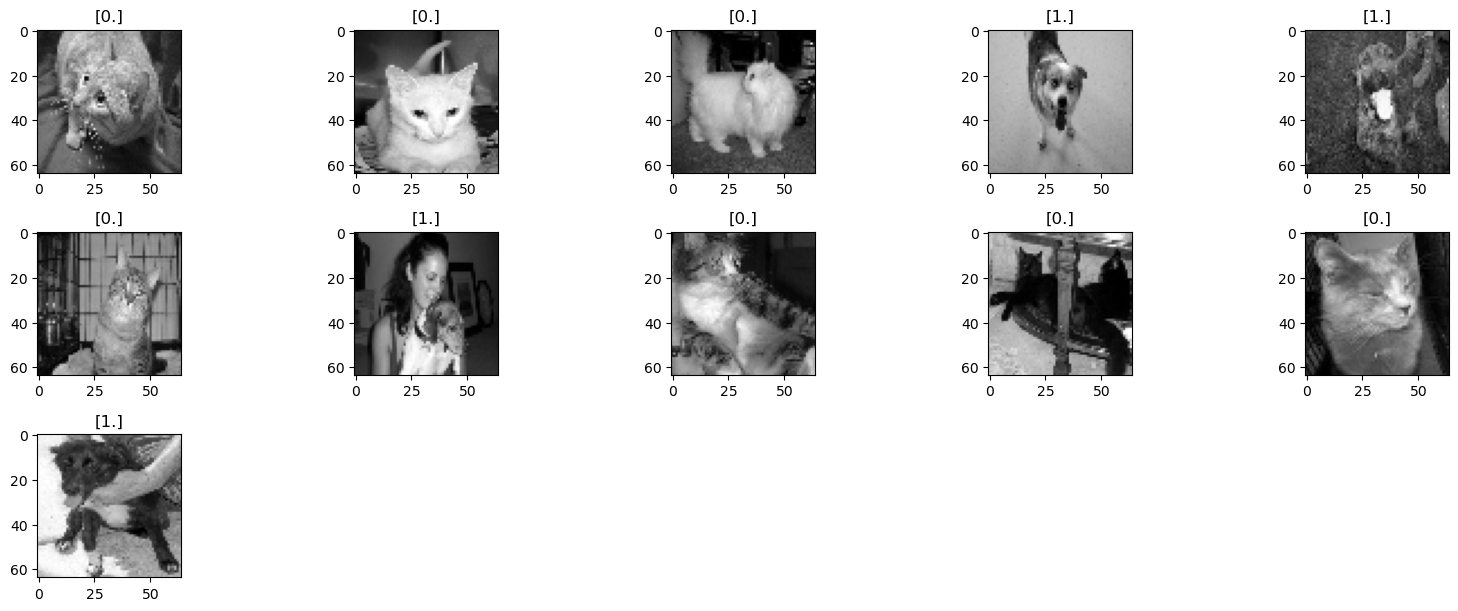

In [28]:
plt.figure(figsize=(16, 8))
for i in range(1, 12):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()

    

In [29]:
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [30]:
print("X_train_reshape shape :", X_train_reshape.shape)
print("X_test_reshape shape :", X_test_reshape.shape)

X_train_reshape shape : (1000, 4096)
X_test_reshape shape : (200, 4096)


In [31]:
X_train_reshape

array([[164, 174, 163, ...,  87, 180,  39],
       [ 42,  43,  39, ...,  55,  52,  55],
       [ 27,  26,  29, ..., 135, 141, 121],
       ...,
       [ 47,  68, 142, ..., 202, 202, 203],
       [252, 252, 252, ...,  64,  66,  59],
       [122, 126, 130, ..., 161, 160, 160]], dtype=uint8)

$$ X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}} $$

In [32]:
def normalisation(X):
    X_norm = (X-X.min())/(X.max() - X.min())
    return X_norm

In [33]:
X_train_norm = normalisation(X_train_reshape)
X_test_norm = normalisation(X_test_reshape)

In [34]:
X_train_norm

array([[0.64566929, 0.68503937, 0.64173228, ..., 0.34251969, 0.70866142,
        0.15354331],
       [0.16535433, 0.16929134, 0.15354331, ..., 0.21653543, 0.20472441,
        0.21653543],
       [0.10629921, 0.1023622 , 0.11417323, ..., 0.53149606, 0.55511811,
        0.47637795],
       ...,
       [0.18503937, 0.26771654, 0.55905512, ..., 0.79527559, 0.79527559,
        0.7992126 ],
       [0.99212598, 0.99212598, 0.99212598, ..., 0.2519685 , 0.25984252,
        0.23228346],
       [0.48031496, 0.49606299, 0.51181102, ..., 0.63385827, 0.62992126,
        0.62992126]])

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:18<00:00, 164.53it/s]


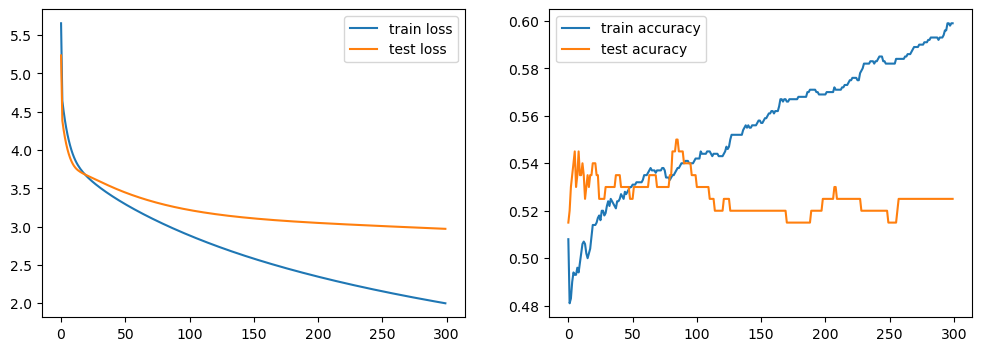

In [43]:
artificial_neuron(X_train_norm, y_train, X_test_norm, y_test, lear_rate=0.01, n_iter=3000)